#  Desafio Cientista de dados II
- Questão A.
- a auto avaliação está no final do ReadME

In [5]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import os
bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.7.1
NumPy                |     1.25.2
Pandas               |      2.0.3
Scikit-Learn         |      1.4.0
Seaborn              |     0.12.2

Versão do Python: 3.10.4


In [2]:
#Importar a base de dados
data = '../dados/dados.csv'
base = pd.read_csv(data)
base.head(3)

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box


In [3]:
#Informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [4]:
#Confirmando que não há valores vazios
base.isnull().sum().head(13)

Order_ID                0
Order_Priority          0
Order_Quantity          0
Sales                   0
Ship_Mode               0
Profit                  0
Customer_Name           0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub-Category    0
Product_Name            0
Product_Container       0
dtype: int64

# Avaliando as colunas numéricas

In [5]:
#Descrição da parte numerica
with pd.option_context('display.float_format', '{:.2f}'.format,
                      'display.max_columns',None):
    display(base.describe())

,Order_ID,Order_Quantity,Sales,Profit
count,730.00,730.00,730.00,730.00
mean,29721.60,24.86,1502.78,207.48
std,17350.56,14.18,2893.94,878.63
min,35.00,1.00,8.60,-4437.91
25%,14479.00,13.00,171.10,-77.13
50%,29350.50,25.00,438.70,0.04
75%,44978.50,37.00,1480.86,180.00
max,59909.00,50.00,27663.92,8417.57


In [6]:
#Descrição da parte numerica
with pd.option_context('display.float_format', '{:.2f}'.format,
                      'display.max_columns',None):
    display(base.describe())

,Order_ID,Order_Quantity,Sales,Profit
count,730.00,730.00,730.00,730.00
mean,29721.60,24.86,1502.78,207.48
std,17350.56,14.18,2893.94,878.63
min,35.00,1.00,8.60,-4437.91
25%,14479.00,13.00,171.10,-77.13
50%,29350.50,25.00,438.70,0.04
75%,44978.50,37.00,1480.86,180.00
max,59909.00,50.00,27663.92,8417.57


In [7]:
#Relatorio para facilitar a análise
from ydata_profiling import ProfileReport
profile = ProfileReport(base)
profile.to_file("../report/eda_profit.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#Verificando se como Order_ID e Customer_Name se relacionam
base.groupby('Customer_Name')['Order_ID'].value_counts().sort_values(ascending=True)

Customer_Name   Order_ID
Aaron Bergman   4132        1
Liz Price       20389       1
                50338       1
                52933       1
                57671       1
                           ..
Bill Donatelli  15808       3
Bruce Stewart   24386       3
Hilary Holden   47846       4
Beth Paige      8995        4
Justin Knight   24132       6
Name: count, Length: 571, dtype: int64

In [9]:
#Olhando os Order_ID que mais se repetem
base.loc[(base['Order_ID'] == 24132) | (base['Order_ID'] == 8995)]

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
129,8995,High,5,24.16,Express Air,8.05,Beth Paige,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,Staples® General Use 3-Ring Binders,Small Box
130,8995,High,41,270.84,Express Air,-78.02,Beth Paige,Northwest Territories,Consumer,Office Supplies,Paper,Xerox 1904,Small Box
252,8995,High,42,266.36,Regular Air,-191.28,Beth Paige,Northwest Territories,Consumer,Office Supplies,Paper,Xerox 217,Small Box
527,24132,Low,4,31.01,Regular Air,-4.49,Justin Knight,West,Corporate,Office Supplies,Binders and Binder Accessories,Wilson Jones DublLock® D-Ring Binders,Small Box
528,24132,Low,46,331.83,Regular Air,-101.25,Justin Knight,West,Corporate,Office Supplies,Binders and Binder Accessories,"Wilson Jones Hanging View Binder, White, 1""",Small Box
529,24132,Low,22,446.46,Regular Air,-1.88,Justin Knight,West,Corporate,Technology,Computer Peripherals,"Fellowes Basic 104-Key Keyboard, Platinum",Small Box
530,24132,Low,31,1252.89,Regular Air,339.75,Justin Knight,West,Corporate,Office Supplies,Binders and Binder Accessories,Ibico Recycled Linen-Style Covers,Small Box
531,24132,Low,12,47.79,Regular Air,-57.75,Justin Knight,West,Corporate,Office Supplies,Binders and Binder Accessories,Self-Adhesive Ring Binder Labels,Small Box
532,24132,Low,3,63.84,Regular Air,-47.97,Justin Knight,West,Corporate,Office Supplies,Storage & Organization,"Tenex File Box, Personal Filing Tote with Lid,...",Small Box


In [10]:
#Verificando os Order_ID da cliente Liz
base.loc[(base['Customer_Name'] == 'Liz Price')]

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
113,50338,Not Specified,36,551.4400,Regular Air,28.70,Liz Price,Atlantic,Corporate,Technology,Office Machines,Sharp EL500L Fraction Calculator,Medium Box
194,11332,Low,23,1223.3795,Express Air,83.57,Liz Price,West,Corporate,Technology,Telephones and Communication,i500plus,Small Box
197,20389,High,30,201.3500,Express Air,-107.37,Liz Price,West,Corporate,Office Supplies,Paper,Xerox 1920,Small Box
213,52933,Low,44,210.4600,Express Air,50.04,Liz Price,Atlantic,Consumer,Office Supplies,Binders and Binder Accessories,Avery Non-Stick Binders,Small Box
300,4257,Medium,45,253.8900,Regular Air,-83.66,Liz Price,West,Consumer,Office Supplies,Envelopes,Staples Brown Kraft Recycled Clasp Envelopes,Small Box
319,47520,Not Specified,36,277.8800,Regular Air,-64.41,Liz Price,Atlantic,Consumer,Office Supplies,Binders and Binder Accessories,GBC VeloBinder Strips,Small Box
320,47520,Not Specified,47,925.3000,Regular Air,257.31,Liz Price,Atlantic,Consumer,Office Supplies,Paper,Xerox Blank Computer Paper,Small Box
326,57671,Not Specified,6,22.7800,Regular Air,3.96,Liz Price,Atlantic,Consumer,Office Supplies,Labels,Avery 510,Small Box
603,18179,Not Specified,24,73.3700,Regular Air,16.10,Liz Price,West,Corporate,Office Supplies,Labels,Avery 481,Small Box


- Optarei por excluir as colunas "Order_ID" e "Customer_Name", as colunas não trazem informações adicionais significativas. 

In [11]:
#Exclusão das 2 colunas
base.drop(['Order_ID','Customer_Name'], axis=1, inplace=True)

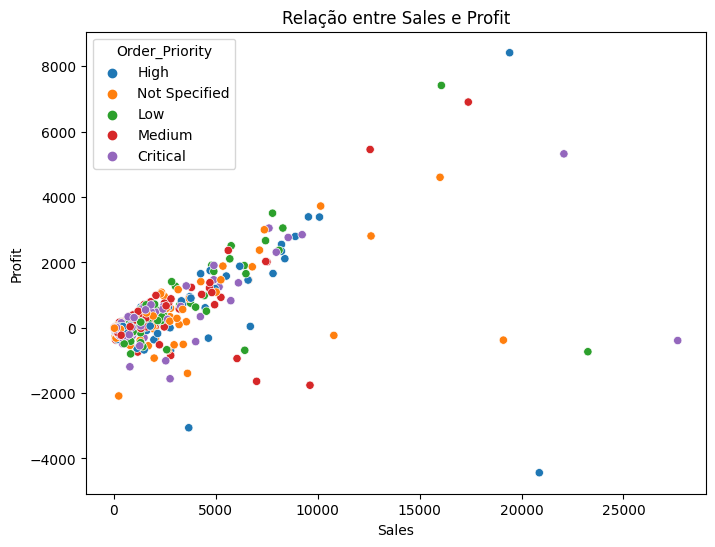

In [12]:
#Visualização das 3 colunas númericas.
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=base, hue='Order_Priority')
plt.title('Relação entre Sales e Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Order_Priority')
%matplotlib inline
plt.show()

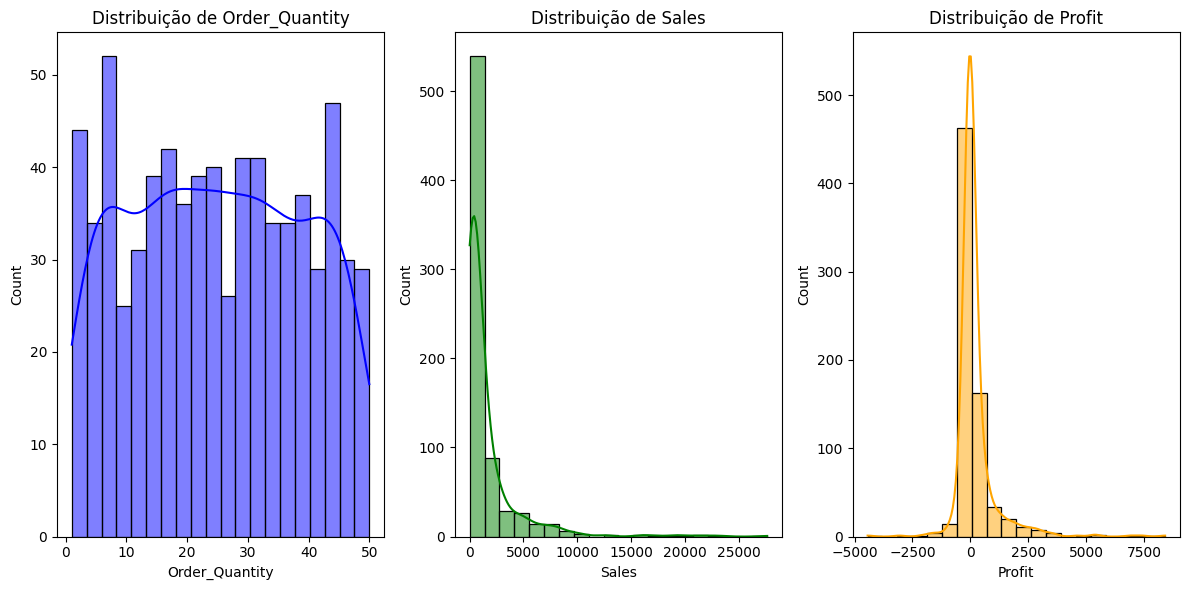

In [13]:
# Visualizando como as colunas se relacionam entre si.
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(base['Order_Quantity'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Order_Quantity')

plt.subplot(1, 3, 2)
sns.histplot(base['Sales'], bins=20, kde=True, color='green')
plt.title('Distribuição de Sales')

plt.subplot(1, 3, 3)
sns.histplot(base['Profit'], bins=20, kde=True, color='orange')
plt.title('Distribuição de Profit')

plt.tight_layout()
plt.show()

- A Variável Order_Quantity possui distribuição uniforme;
- A Variável Sales possui distribuição de calda longa;
- A variável Profit possui distribuição normal;
- Profit possui muitos valores distintos. Para ajudar na análise, criarei uma variável chamada "Target", onde, se profit for positivo ela será igual a 1, e se profit for 0 ou negativo ela será igual a 0.

In [14]:
base['Target'] = base['Profit'].apply(lambda x: 1 if x > 0 else 0)
base['Target'].value_counts()

Target
0    365
1    365
Name: count, dtype: int64

In [15]:
#Criando Variavel para detectar Outliers
numerical_features = base.select_dtypes(include='number').columns.tolist()
print(numerical_features)
print(len(numerical_features))

['Order_Quantity', 'Sales', 'Profit', 'Target']
4


In [16]:
#Criando um arquivo chamaado Auxiliary_functions para facilitar a leitura do codigo
import Auxiliary_functions as af

In [17]:
#Verificando Outlier em 'Order_Quantity'
af.inspect_outliers(base,numerical_features[0])

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Target


In [18]:
#Verificando Outlier em 'Sales'
af.inspect_outliers(base,numerical_features[1])

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Target
7,Low,21,4429.6900,Express Air,983.55,Atlantic,Small Business,Technology,Copiers and Fax,Canon PC-428 Personal Copier,Large Box,1
8,Not Specified,40,19109.6100,Express Air,-379.29,West,Home Office,Technology,Copiers and Fax,Sharp AL-1530CS Digital Copier,Large Box,0
13,Critical,15,4012.5800,Express Air,-425.14,Atlantic,Consumer,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box,0
16,Low,31,16066.8500,Regular Air,7416.43,Northwest Territories,Consumer,Technology,Office Machines,Polycom ViaVideo™ Desktop Video Communications...,Large Box,1
18,High,24,4636.6200,Regular Air,-318.45,West,Consumer,Furniture,Tables,Hon 2111 Invitation™ Series Corner Table,Large Box,0
...,...,...,...,...,...,...,...,...,...,...,...,...
697,High,41,4256.5100,Regular Air,1653.96,Prarie,Corporate,Technology,Computer Peripherals,Gyration Ultra Cordless Optical Suite,Small Box,1
702,Not Specified,40,7381.1900,Regular Air,2998.88,Ontario,Corporate,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center,Small Box,1
707,Medium,46,4804.0385,Regular Air,1077.92,Ontario,Corporate,Technology,Telephones and Communication,StarTAC 6500,Small Box,1
716,Low,37,6477.7395,Regular Air,1653.97,Ontario,Corporate,Technology,Telephones and Communication,Talkabout T8097,Small Box,1


In [19]:
#Verificando Outlier em 'Profit'
af.inspect_outliers(base,numerical_features[2])

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Target
0,High,21,2781.8200,Express Air,-695.26,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,0
1,High,35,3389.9300,Express Air,737.94,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box,1
4,Medium,24,1168.1500,Express Air,-743.96,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box,0
5,Not Specified,45,237.2800,Express Air,-2088.68,Northwest Territories,Small Business,Office Supplies,Appliances,Hoover Portapower™ Portable Vacuum,Large Box,0
7,Low,21,4429.6900,Express Air,983.55,Atlantic,Small Business,Technology,Copiers and Fax,Canon PC-428 Personal Copier,Large Box,1
...,...,...,...,...,...,...,...,...,...,...,...,...
706,Critical,30,3276.9965,Regular Air,653.06,Ontario,Corporate,Technology,Telephones and Communication,M70,Small Box,1
707,Medium,46,4804.0385,Regular Air,1077.92,Ontario,Corporate,Technology,Telephones and Communication,StarTAC 6500,Small Box,1
716,Low,37,6477.7395,Regular Air,1653.97,Ontario,Corporate,Technology,Telephones and Communication,Talkabout T8097,Small Box,1
718,Medium,38,2063.4200,Regular Air,989.95,Ontario,Corporate,Office Supplies,Paper,Xerox 1934,Small Box,1


- Apesar de existir outliers, pelo meu pouco conhecimento de negócio e ter uma quantidade grande de outliers nas 2 das 3 colunas (11% e 18% respectivamente) acredito que a melhor alternativa seja manter os dados e não fazer nenhum tratamento.

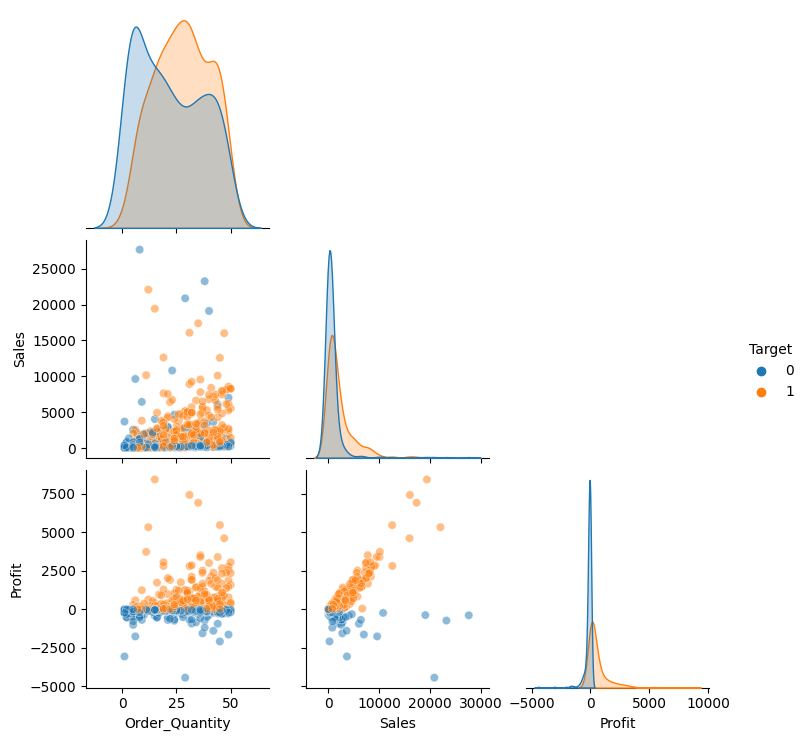

In [20]:
#Verificando como as variaveis numericas se comportam com a variavel Target
af.pairplot(base,numerical_features[0:3],hue_column='Target')

## Avaliando as colunas de texto

In [21]:
#Descrição da parte em texto
base.describe(exclude='number')

,Order_Priority,Ship_Mode,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
count,730,730,730,730,730,730,730,730
unique,5,2,6,4,3,15,445,3
top,Not Specified,Regular Air,West,Corporate,Office Supplies,Binders and Binder Accessories,Canon MP41DH Printing Calculator,Small Box
freq,156,579,232,518,447,137,5,606


In [22]:
base.Product_Name.value_counts()

Product_Name
Canon MP41DH Printing Calculator                               5
GBC DocuBind 200 Manual Binding Machine                        5
Fellowes Basic 104-Key Keyboard, Platinum                      5
T28 WORLD                                                      5
StarTAC 7760                                                   5
                                                              ..
Avery 498                                                      1
Xerox 1903                                                     1
Staples Copy Paper (20Lb. and 84 Bright)                       1
Tuff Stuff™ Recycled Round Ring Binders                        1
Wilson Jones 14 Line Acrylic Coated Pressboard Data Binders    1
Name: count, Length: 445, dtype: int64

## Análise de correlações do relatório
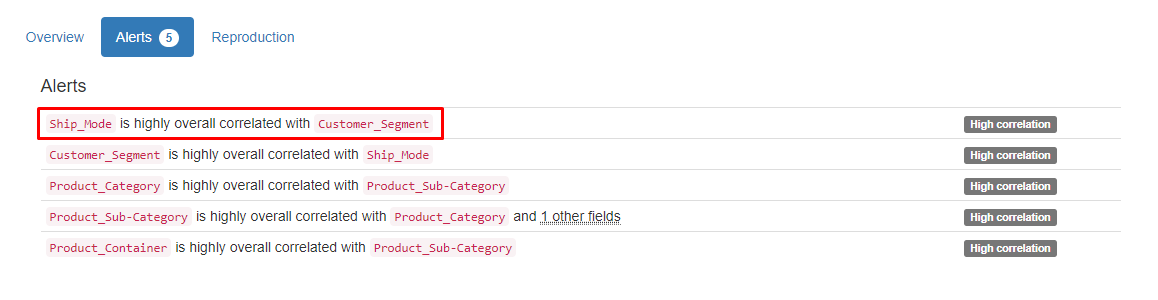
- Podemos ver que o relatorio já indica uma alta correlação entre Ship_Mode e Customer_segment
- Correlações entre 'Product_Category' e 'Product_Sub-Category' são esperadas.

In [23]:
#Verificando a correlação citada acima.
base.groupby('Ship_Mode')['Customer_Segment'].value_counts()

Ship_Mode    Customer_Segment
Express Air  Corporate            62
             Home Office          31
             Consumer             30
             Small Business       28
Regular Air  Corporate           456
             Consumer            123
Name: count, dtype: int64

- Irei aplicar o pré-processamento agora, logo preciso excluir a variável 'Target' para evitar ter problemas com o modelo.

In [25]:
#Exclusão da coluna 'Target'
base=base.drop('Target',axis=1)

# Pré-Processamento

#### Separando para o pré-processamento:
##### [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html): Order_Priority, Product_Container 
- Colunas são valores categoricos, uma variável possui ordem grandeza definida.
##### [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html): "Ship_Mode", "Region", "Customer_Segment" e "Product_Category"
- Colunas possuem poucos valores distintos e sem ordem de grandeza definida.
##### [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html): 'Product_Sub-Category', 'Product_Name'.
- Colunas que possuem vários valores únicos, mas acredito serem importantes para o modelo.
##### [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) : 'Order_Quantity', 'Sales'
- Colunas numéricas que estão com diferença de intervalos muito grande, então irei deixar em escalas similares

In [26]:
#Separando a base em X e y
X = base.drop('Profit',axis=1)
y = base.Profit

In [29]:
# Definir as colunas para cada tipo de transformação
ord_enc_cols=['Order_Priority',
            'Product_Container']

one_hot_cols = ['Ship_Mode', 
                'Region', 
                'Customer_Segment',
                'Product_Category']

MinMax_cols = ['Order_Quantity', 
                 'Sales']

lab_enc_col1=['Product_Sub-Category']
lab_enc_col2=['Product_Name']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold



RANDOM_STATE = 42
models_regression = {
"LinearRegression": LinearRegression(),
"DecisionTreeRegressor": tree.DecisionTreeRegressor(random_state=RANDOM_STATE),
"RandomForestRegressor": RandomForestRegressor(random_state=RANDOM_STATE),
"DummyRegressor": DummyRegressor(strategy="mean")
}
skf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE) 


def pipeline_model_regression(X, y, model, kf):

    preprocessing = ColumnTransformer(
        [
            ('ordinal', OrdinalEncoder(), ord_enc_cols),
            ('onehot', OneHotEncoder(), one_hot_cols),
            ('minmax', MinMaxScaler(), MinMax_cols)
        ]
    )
    pipeline = Pipeline(
        [
            ('preprocessing', preprocessing),
            ('feature_selection', SelectKBest(score_func=f_regression, k=10)),
            ('model', model)
        ]
    )

    scores = cross_validate(
        pipeline,
        X,
        y,
        cv=kf,
        scoring = {'neg_mean_squared_error': 'neg_mean_squared_error',
                 'neg_mean_absolute_error': 'neg_mean_absolute_error',
                 'r2': 'r2',
                'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error',
    }
    )

    return scores


In [31]:
# Criando um dicionário para armazenar os resultados
results = {
    "LinearRegression": pipeline_model_regression(X, y, models_regression["LinearRegression"], skf),
    "DecisionTreeRegressor": pipeline_model_regression(X, y, models_regression["DecisionTreeRegressor"], skf),
    "RandomForestRegressor": pipeline_model_regression(X, y, models_regression["RandomForestRegressor"], skf),
    "DummyRegressor": pipeline_model_regression(X, y, models_regression["DummyRegressor"], skf)
}

In [32]:
#Facilitando a leitura das respostas
from pprint import pprint

pprint(results)

{'DecisionTreeRegressor': {'fit_time': array([0.01199985, 0.01400018, 0.01299977, 0.01251006, 0.01300073]),
                           'score_time': array([0.00600147, 0.00700283, 0.00700641, 0.00599861, 0.00600076]),
                           'test_neg_mean_absolute_error': array([-298.15068493, -365.46821918, -283.5       , -243.87534247,
       -338.07424658]),
                           'test_neg_mean_absolute_percentage_error': array([-2.17287632, -3.47335004, -7.35682116, -8.410554  , -4.42603724]),
                           'test_neg_mean_squared_error': array([-495188.50089863, -492946.21796849, -488576.74836438,
       -334766.85896575, -657350.54683562]),
                           'test_r2': array([ 4.87609266e-01,  5.23483260e-01,  4.42750741e-01, -1.24413146e-01,
        3.87250720e-04])},
 'DummyRegressor': {'fit_time': array([0.00999808, 0.0100019 , 0.01000738, 0.01051211, 0.01000094]),
                    'score_time': array([0.00599813, 0.00799918, 0.00699878, 0.0069

In [33]:
# Adicionando o tempo
for k, v in results.items():
    results[k]['time'] = results[k]['fit_time'] + results[k]['score_time']

pprint(results)

{'DecisionTreeRegressor': {'fit_time': array([0.01199985, 0.01400018, 0.01299977, 0.01251006, 0.01300073]),
                           'score_time': array([0.00600147, 0.00700283, 0.00700641, 0.00599861, 0.00600076]),
                           'test_neg_mean_absolute_error': array([-298.15068493, -365.46821918, -283.5       , -243.87534247,
       -338.07424658]),
                           'test_neg_mean_absolute_percentage_error': array([-2.17287632, -3.47335004, -7.35682116, -8.410554  , -4.42603724]),
                           'test_neg_mean_squared_error': array([-495188.50089863, -492946.21796849, -488576.74836438,
       -334766.85896575, -657350.54683562]),
                           'test_r2': array([ 4.87609266e-01,  5.23483260e-01,  4.42750741e-01, -1.24413146e-01,
        3.87250720e-04]),
                           'time': array([0.01800132, 0.02100301, 0.02000618, 0.01850867, 0.01900148])},
 'DummyRegressor': {'fit_time': array([0.00999808, 0.0100019 , 0.01000738, 0.010

In [34]:
#Criando um dataframe apartir do dicionario
base_results = pd.DataFrame(results).T.reset_index().rename(columns={"index": "model"})
base_results

,model,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_r2,test_neg_mean_absolute_percentage_error,time
0,LinearRegression,"[0.01200103759765625, 0.010000944137573242, 0....","[0.006999492645263672, 0.007001638412475586, 0...","[-750531.0871040651, -546362.917098468, -51809...","[-339.3533208672591, -365.2504011528508, -309....","[0.22339639570768222, 0.47184689350983955, 0.4...","[-3.9497022772674457, -4.50275341504778, -14.3...","[0.019000530242919922, 0.017002582550048828, 0..."
1,DecisionTreeRegressor,"[0.011999845504760742, 0.014000177383422852, 0...","[0.006001472473144531, 0.007002830505371094, 0...","[-495188.5008986301, -492946.2179684932, -4885...","[-298.1506849315069, -365.4682191780822, -283....","[0.4876092660121035, 0.5234832595607624, 0.442...","[-2.172876319359904, -3.4733500388408753, -7.3...","[0.018001317977905273, 0.021003007888793945, 0..."
2,RandomForestRegressor,"[0.25002408027648926, 0.2475414276123047, 0.24...","[0.012007713317871094, 0.012998342514038086, 0...","[-596984.4531654526, -390825.4143128414, -2369...","[-268.95325273972594, -299.10031232876713, -21...","[0.3822770488779429, 0.6222004638220533, 0.729...","[-1.2549914108589646, -2.3493239134143686, -4....","[0.26203179359436035, 0.2605397701263428, 0.26..."
3,DummyRegressor,"[0.009998083114624023, 0.010001897811889648, 0...","[0.005998134613037109, 0.007999181747436523, 0...","[-966935.5324610459, -1059960.6946336133, -877...","[-496.40568540063805, -535.2684143366484, -453...","[-0.0005256711284495896, -0.024633107607699323...","[-7.451012126013959, -7.12654342947813, -21.90...","[0.015996217727661133, 0.018001079559326172, 0..."


In [35]:
#Pegando o nome das colunas
base_results.columns[1:].to_list()

['fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_neg_mean_absolute_error',
 'test_r2',
 'test_neg_mean_absolute_percentage_error',
 'time']

In [36]:
#Retirar as informações de 'Array' 
base_results_explode = base_results.explode(
    base_results.columns[1:].to_list()
).reset_index(drop=True)

base_results_explode

,model,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_r2,test_neg_mean_absolute_percentage_error,time
0,LinearRegression,0.012001,0.006999,-750531.087104,-339.353321,0.223396,-3.949702,0.019001
1,LinearRegression,0.010001,0.007002,-546362.917098,-365.250401,0.471847,-4.502753,0.017003
2,LinearRegression,0.009999,0.007009,-518095.342828,-309.671649,0.409083,-14.319352,0.017008
3,LinearRegression,0.010506,0.006004,-245558.59525,-270.441358,0.175219,-45.793374,0.01651
4,LinearRegression,0.009,0.006999,-446014.026607,-301.82843,0.32176,-13.268124,0.015998
5,DecisionTreeRegressor,0.012,0.006001,-495188.500899,-298.150685,0.487609,-2.172876,0.018001
6,DecisionTreeRegressor,0.014,0.007003,-492946.217968,-365.468219,0.523483,-3.47335,0.021003
7,DecisionTreeRegressor,0.013,0.007006,-488576.748364,-283.5,0.442751,-7.356821,0.020006
8,DecisionTreeRegressor,0.01251,0.005999,-334766.858966,-243.875342,-0.124413,-8.410554,0.018509
9,DecisionTreeRegressor,0.013001,0.006001,-657350.546836,-338.074247,0.000387,-4.426037,0.019001


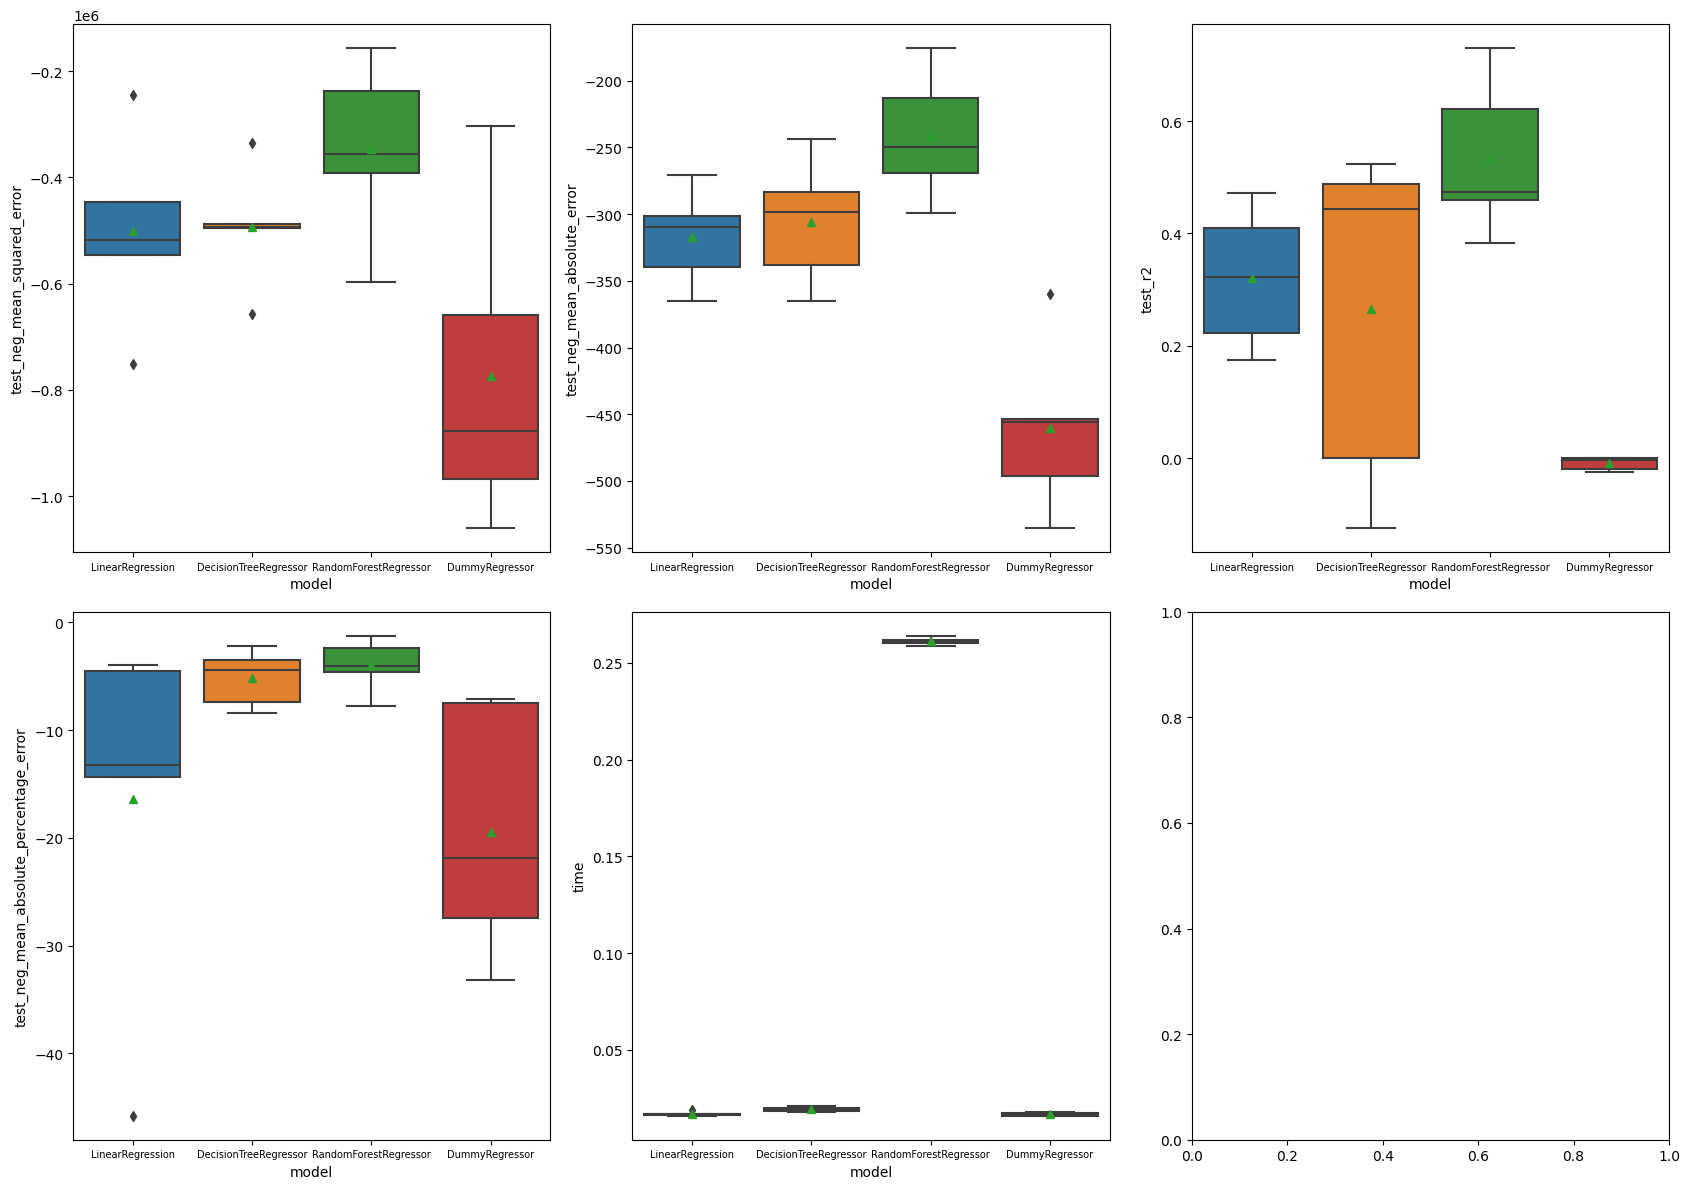

In [37]:
#Coloando o 'base_results_explode' em forma gráfica
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(17, 12), tight_layout=True)

cols = base_results.columns[3:].to_list()

for ax, col in zip(axs.flatten(), cols):
    b = sns.boxplot(x="model", y=col, data=base_results_explode, ax=ax, showmeans=True)
    b.set_xticklabels(b.get_xticklabels(), fontsize=7)

plt.show()

# Considerações

- RandomForestRegressor foi o melhor modelo em 3 parametros adotados
- Como esperado, o DummyRegressor foi o pior modelo já que se trata de um modelo simples apenas como comparação.
- O modelo DecisionTreeRegressor também apresentou bons parametros comparados ao LinearRegression
#### Após as avaliações, iremos tentar melhorar o modelo RandomForestRegressor com hiperparametros.

In [38]:
#Aplicando o Pré-processamento e o Pipeline novamente.
preprocessing = ColumnTransformer(
    [
        ('ordinal', OrdinalEncoder(), ord_enc_cols),
        ('onehot', OneHotEncoder(), one_hot_cols),
        ('minmax', MinMaxScaler(), MinMax_cols)
    ]
)
pipeline_2 = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('feature_selection', SelectKBest(score_func=f_regression, k=5)),
        ('model', RandomForestRegressor(random_state=RANDOM_STATE))
    ]
)


In [39]:
#Fazendo o Fit
pipeline_2.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Order_Priority',
                                                   'Product_Container']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Ship_Mode', 'Region',
                                                   'Customer_Segment',
                                                   'Product_Category']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Order_Quantity',
                                                   'Sales'])])),
                ('feature_selection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x0000025352A68B80>)),
                ('model', RandomForestRegressor(random_state=42))])

In [40]:
#As 5 principais colunas escolhidas pelo modelo
pipeline_2[:-1].get_feature_names_out()

array(['onehot__Region_Northwest Territories',
       'onehot__Product_Category_Office Supplies',
       'onehot__Product_Category_Technology', 'minmax__Order_Quantity',
       'minmax__Sales'], dtype=object)

# Escolhas dos hiperparametros com o GridSearchCV

In [41]:
#Verificando os Hiperparametros
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_estimators': [10, 25, 50, 100, 150, 200],
    'model__max_depth': np.arange(10, 31, 10),
    'model__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    pipeline_2,
    param_grid,
    scoring=['neg_mean_squared_error',
             'neg_mean_absolute_error',
             'r2',
             'neg_mean_absolute_percentage_error'],
    refit='r2'
)

In [42]:
#Verificando as etapas do Grid_Search
grid_search

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Order_Priority',
                                                                          'Product_Container']),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Ship_Mode',
                                                                          'Region',
                                                                          'Customer_Segment',
                                                                          'Product_Category']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['Order_Quantity',
                                                                          'Sales'])])),
                                       ('feature_selection',
                                        SelectKBest(k=5,
                                                    score_func=<function f_regression at 0x0000025352A68B80>)),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': array([10, 20, 30]),
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__n_estimators': [10, 25, 50, 100, 150, 200]},
             refit='r2',
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2',
                      'neg_mean_absolute_percentage_error'])

In [47]:
# Ajustar o GridSearchCV aos dados de treinamento
# Importei a biblioteca Warning para evitar os avisos. O modelo não possui erro e estou ignorando apenas após verificá-los.
warnings.filterwarnings('ignore')
grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Order_Priority',
                                                                          'Product_Container']),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Ship_Mode',
                                                                          'Region',
                                                                          'Customer_Segment',
                                                                          'Product_Category']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['Order_Quantity',
                                                                          'Sales'])])),
                                       ('feature_selection',
                                        SelectKBest(k=5,
                                                    score_func=<function f_regression at 0x0000025352A68B80>)),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': array([10, 20, 30]),
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__n_estimators': [10, 25, 50, 100, 150, 200]},
             refit='r2',
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2',
                      'neg_mean_absolute_percentage_error'])

In [48]:
# Obter os melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros:", best_params)

Melhores parâmetros: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 10}


In [49]:
# Obter o melhor modelo encontrado
best_model = grid_search.best_estimator_

In [50]:
# Avaliando o desempenho do melhor modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Realizar previsões
y_pred = best_model.predict(X)

# Calcular métricas de avaliação
print("Métricas de Avaliação do RandomForestRegressor:")
print("Mean Squared Error (MSE):", mean_squared_error(y, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y, y_pred))
print("R-squared (R2):", r2_score(y, y_pred))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y, y_pred))

Métricas de Avaliação do RandomForestRegressor:
Mean Squared Error (MSE): 101834.65730412288
Mean Absolute Error (MAE): 129.7122282651371
R-squared (R2): 0.8679075892104682
Mean Absolute Percentage Error (MAPE): 2.446092798278278


Text(0.5, 1.0, 'RandomForestRegressor')

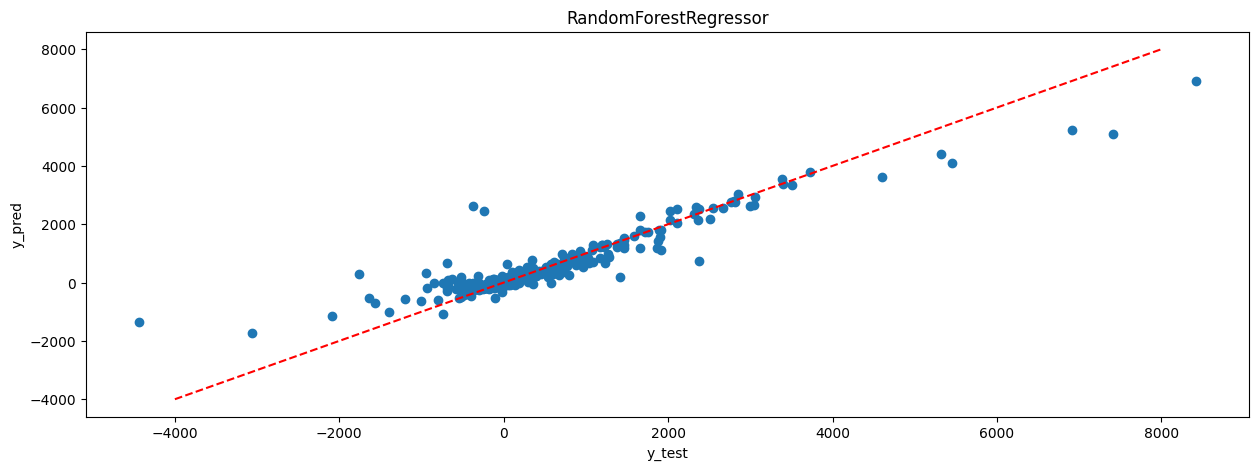

In [51]:
# Criando esse gráfico
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(y, y_pred)
ax.plot([-4000,8000],[-4000,8000],'--r')

ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')
ax.set_title('RandomForestRegressor')